**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Sklearn

## sklearn.liner_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [83]:
#creating a cloud with two epicenters (as default)
blobs = datasets.make_blobs(n_samples = 1000000, centers = 2, cluster_std = 5.5, random_state=1)
blobs

(array([[  0.53929574,  10.62289395],
        [ -2.17926393,   7.15943106],
        [-13.73122765,   2.63492383],
        ...,
        [ -0.5183548 ,  -0.92297958],
        [ -4.42504018,   0.62121954],
        [-12.50406345,   3.95725124]]),
 array([0, 0, 1, ..., 0, 0, 1]))

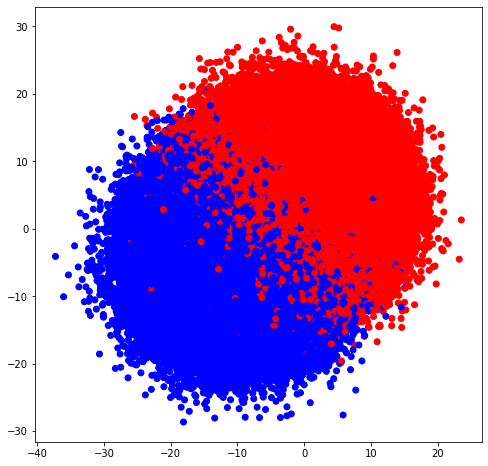

In [84]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [85]:
#train test data separation
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

#### RidgeClassifier

In [86]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)
type(ridge_classifier)

sklearn.linear_model._ridge.RidgeClassifier

In [87]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(random_state=1)

In [88]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [89]:
print(test_labels)

[0 1 0 ... 1 0 0]


In [90]:
print(ridge_predictions)

[0 1 0 ... 1 1 0]


In [91]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.85895

In [92]:
ridge_classifier.coef_

array([[-0.06401956, -0.06436317]])

In [93]:
ridge_classifier.intercept_ 

array([-0.35789476])

#### LogisticRegression

In [94]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [95]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(random_state=1)

In [96]:
lr_predictions = log_regressor.predict(test_data)

In [97]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [98]:
print(test_labels)

[0 1 0 ... 1 0 0]


In [99]:
print(lr_predictions)

[0 1 0 ... 1 1 0]


In [100]:
print(lr_proba_predictions)

[[0.61620539 0.38379461]
 [0.06772768 0.93227232]
 [0.99559182 0.00440818]
 ...
 [0.00582906 0.99417094]
 [0.45799342 0.54200658]
 [0.90517916 0.09482084]]


In [101]:
print(metrics.accuracy_score(test_labels, lr_predictions))

0.85895


In [102]:
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.85895


### Оценка качества по cross-validation

#### cross_val_score

In [103]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], 
                                                scoring = 'accuracy', cv = 10)
print(ridge_scoring)

[0.8608  0.85916 0.85872 0.85893 0.85857 0.86024 0.85732 0.85728 0.85859
 0.86021]


In [104]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1],
                                             scoring = 'accuracy', cv = 10)
print(lr_scoring)

[0.86084 0.85923 0.85871 0.85889 0.85861 0.86022 0.85729 0.85726 0.85859
 0.8602 ]


In [105]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8589819999999999, max:0.8608, min:0.85728, std:0.001117191120623506


In [106]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8589840000000001, max:0.86084, min:0.85726, std:0.001128381141281618


#### cross_val_score с заданными scorer и cv_strategy

In [107]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [108]:
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size = 0.3, random_state = 2)
cv_strategy.get_n_splits(blobs[1])

20

In [109]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [110]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [111]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8590811666666667, max:0.86004, min:0.8576533333333334, std:0.0006511863319272743


In [112]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8590855, max:0.86005, min:0.85765, std:0.0006442293199371357
